In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [3]:
df=pd.read_csv("D:\\shru\\Sem 5\\ML\\files\\AirQualityUCI.csv")

In [4]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [5]:
df.head(20)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
5,10-03-2004,23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,NaN,NaN
6,11-03-2004,00:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,NaN,NaN
7,11-03-2004,01:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,NaN,NaN
8,11-03-2004,02:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,NaN,NaN
9,11-03-2004,03:00:00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517,NaN,NaN


In [6]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

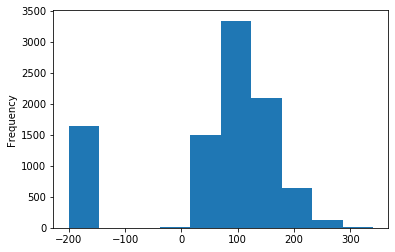

In [7]:
df['NO2(GT)'].plot.hist()

In [8]:
percnan=pd.DataFrame([(col,df[col].isna().mean()*100)for col in df],columns=["Features","percentage"])

In [9]:
percnan

,Features,percentage
0,Date,1.203674
1,Time,1.203674
2,CO(GT),1.203674
3,PT08.S1(CO),1.203674
4,NMHC(GT),1.203674
5,C6H6(GT),1.203674
6,PT08.S2(NMHC),1.203674
7,NOx(GT),1.203674
8,PT08.S3(NOx),1.203674
9,NO2(GT),1.203674


In [10]:
perc50=percnan[percnan.percentage>50]
perc50.sort_values("percentage",ascending=False)

,Features,percentage
15,Unnamed: 15,100.0
16,Unnamed: 16,100.0


In [11]:
df=df.drop(['Unnamed: 15','Unnamed: 16'],axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [13]:
print("Number of null values in each column:\n{}".format(df.isnull().sum()))

Number of null values in each column:
Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64


In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year

In [15]:
df['year'].mode()

0    2004.0
dtype: float64

In [16]:
df['year']=df['year'].fillna(2004)

In [17]:
df['year'].astype(int)

0       2004
1       2004
2       2004
3       2004
4       2004
        ... 
9466    2004
9467    2004
9468    2004
9469    2004
9470    2004
Name: year, Length: 9471, dtype: int32

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['hour'] = df['Date'].dt.hour
df['minutes'] = df['Date'].dt.minute
df['seconds'] = df['Date'].dt.second

In [19]:
df['month'].mode()

0    3.0
dtype: float64

In [20]:
df['month']=df['month'].fillna(3)

In [21]:
df['month'].astype(int)

0       10
1       10
2       10
3       10
4       10
        ..
9466     3
9467     3
9468     3
9469     3
9470     3
Name: month, Length: 9471, dtype: int32

In [22]:
df['day'].mode()

0    4.0
dtype: float64

In [23]:
df['day']=df['day'].fillna(4)

In [24]:
df['day'].astype(int)

0       3
1       3
2       3
3       3
4       3
       ..
9466    4
9467    4
9468    4
9469    4
9470    4
Name: day, Length: 9471, dtype: int32

In [25]:
df['hour'].mode()

0    0.0
dtype: float64

In [26]:
df['hour']=df['hour'].fillna(0)

In [27]:
df['hour'].astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
9466    0
9467    0
9468    0
9469    0
9470    0
Name: hour, Length: 9471, dtype: int32

In [28]:
df['minutes'].mode()

0    0.0
dtype: float64

In [29]:
df['minutes']=df['minutes'].fillna(0)

In [30]:
df['minutes'].astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
9466    0
9467    0
9468    0
9469    0
9470    0
Name: minutes, Length: 9471, dtype: int32

In [31]:
df['seconds'].mode()

0    0.0
dtype: float64

In [32]:
df['minutes']=df['minutes'].fillna(0)

In [33]:
df['minutes'].astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
9466    0
9467    0
9468    0
9469    0
9470    0
Name: minutes, Length: 9471, dtype: int32

In [34]:
df=df.drop(['Date','Time'],axis=1)

In [35]:
print("Number of null values in each column:\n{}".format(df.isnull().sum()))

Number of null values in each column:
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
year               0
month              0
day                0
hour               0
minutes            0
seconds          114
dtype: int64


In [36]:
for i in df.columns:
    df[i]=df[i].fillna(df[i].mean())

In [37]:
feat=df.drop(['AH'],axis=1)
val=df['AH'].values

In [38]:
feat.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,year,month,day,hour,minutes,seconds
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,2004.0,10.0,3.0,0.0,0.0,0.0
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,2004.0,10.0,3.0,0.0,0.0,0.0
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,2004.0,10.0,3.0,0.0,0.0,0.0
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,2004.0,10.0,3.0,0.0,0.0,0.0
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,2004.0,10.0,3.0,0.0,0.0,0.0


In [39]:
(train_feat,test_feat,train_classes,test_classes)=train_test_split(feat,val,train_size=0.7,random_state=0)
m=DecisionTreeRegressor(max_depth=6).fit(train_feat,train_classes)

In [40]:
ypred=m.predict(test_feat)

In [41]:
from sklearn import metrics

pred=m.predict(test_feat)
print("MSE:",metrics.mean_squared_error(test_classes,ypred))

MSE: 0.029669566195193654


In [42]:
m.score(train_feat,train_classes)

0.9999817422560155

In [44]:
from sklearn.tree import export_graphviz

export_graphviz(m,
               feature_names=feat.columns)

'digraph Tree {\nnode [shape=box] ;\n0 [label="C6H6(GT) <= -99.95\\nmse = 1561.387\\nsamples = 6629\\nvalue = -7.175"] ;\n1 [label="mse = 0.0\\nsamples = 267\\nvalue = -200.0"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="C6H6(GT) <= 1.883\\nmse = 1.003\\nsamples = 6362\\nvalue = 0.917"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="PT08.S5(O3) <= 914.036\\nmse = 9.012\\nsamples = 459\\nvalue = -0.707"] ;\n2 -> 3 ;\n4 [label="PT08.S4(NO2) <= 971.0\\nmse = 0.119\\nsamples = 371\\nvalue = 0.747"] ;\n3 -> 4 ;\n5 [label="PT08.S4(NO2) <= 860.0\\nmse = 0.018\\nsamples = 170\\nvalue = 0.47"] ;\n4 -> 5 ;\n6 [label="PT08.S4(NO2) <= 728.5\\nmse = 0.007\\nsamples = 120\\nvalue = 0.401"] ;\n5 -> 6 ;\n7 [label="mse = 0.003\\nsamples = 29\\nvalue = 0.303"] ;\n6 -> 7 ;\n8 [label="mse = 0.004\\nsamples = 91\\nvalue = 0.433"] ;\n6 -> 8 ;\n9 [label="PT08.S4(NO2) <= 893.5\\nmse = 0.005\\nsamples = 50\\nvalue = 0.635"] ;\n5 -> 9 ;\n10 [label="